   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

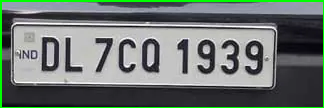

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete✅ Detected Number Plate Text: AIND (Confidence: 0.19)
✅ Detected Number Plate Text: DL 7cQ 1939 (Confidence: 0.50)
📷 Original Image with Plate Detection:


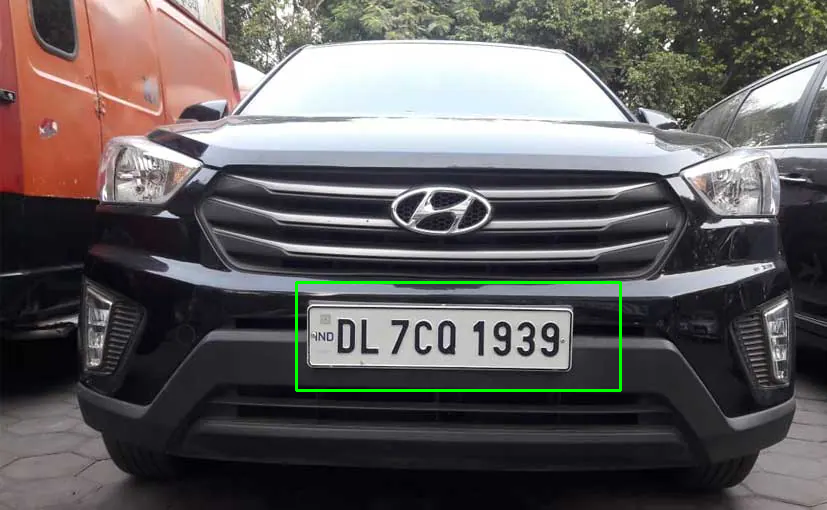

In [1]:
!pip install opencv-python easyocr numpy --quiet

from IPython.display import display
from PIL import Image
import cv2
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

# Step 1: Give the inbuilt image path (make sure the image is available in /content/)
image_path = '/content/np2.jpg'
# Step 2: Load and process image
image = cv2.imread(image_path)

if image is None:
    print("❌ Image not found. Please check the image path.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load Haar cascade for number plate detection
    plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))

    if len(plates) == 0:
        print("❌ No plate detected using Haar Cascade. Falling back to full image OCR...")
        reader = easyocr.Reader(['en'])
        result = reader.readtext(gray)
        for (_, text, prob) in result:
            print(f"🔍 Full Image OCR: {text} (Confidence: {prob:.2f})")
    else:
        for (x, y, w, h) in plates:
            # Draw rectangle on original image (optional)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Crop and display the number plate
            plate_crop = image[y:y + h, x:x + w]
            print("🖼️ Cropped Number Plate Image:")
            cv2_imshow(plate_crop)

            # OCR
            reader = easyocr.Reader(['en'])
            result = reader.readtext(plate_crop)

            if result:
                for (_, text, prob) in result:
                    print(f"✅ Detected Number Plate Text: {text} (Confidence: {prob:.2f})")
            else:
                print("❌ OCR failed on cropped plate. Trying full image OCR...")
                result = reader.readtext(gray)
                for (_, text, prob) in result:
                    print(f"🔍 Full Image OCR: {text} (Confidence: {prob:.2f})")

    print("📷 Original Image with Plate Detection:")
    cv2_imshow(image)
